# Data Preprocessing

In [1]:
import numpy as np
import rpy2.robjects as robjects
robjects.r['load']("GWAS.RData")
G=np.array(robjects.r['L'][0])
y=np.array(robjects.r['L'][1])
mean=np.mean(G,axis=0)
W=(G-mean)/(np.sqrt(np.var(G,axis=0)))
from sklearn.decomposition import PCA
estimator = PCA(n_components=10)
X=estimator.fit_transform(W)
one_column=np.ones((len(X),1))
X=np.concatenate((X,one_column),axis=1)
print(y.shape,W.shape,X.shape)

(5123, 4) (5123, 319147) (5123, 11)


# Method of Moments

In [2]:
import time
from numpy import linalg
Wt=np.transpose(W)
u,sigma,vt=linalg.svd(W.dot(Wt))

In [3]:
# projection matrix
from numpy import linalg
y0=y[:,0]
Xt=np.transpose(X)
p=319147
n=5123
M=np.eye(n)-X.dot(linalg.inv(Xt.dot(X))).dot(Xt)
K=W.dot(Wt)/p
MK=M.dot(K)
S=np.zeros(shape=(2,2))
q=np.zeros(shape=(2,1))
S[0,0]=np.trace(MK.dot(MK))
S[0,1]=np.trace(MK)
S[1,0]=np.trace(MK)
S[1,1]=np.trace(M)
q[0,0]=np.transpose(y0).dot(MK).dot(M).dot(y0)
q[1,0]=np.transpose(y0).dot(M).dot(y0)
sigma=linalg.inv(S).dot(q)
sigma_u_2=sigma[0,0]
sigma_e_2=sigma[1,0]
omega=W.dot(Wt)*sigma_u_2/p+sigma_e_2*np.eye(n)
beta=linalg.inv(Xt.dot(linalg.inv(omega)).dot(X)).dot(Xt).dot(linalg.inv(omega)).dot(y0)
print('sigma_u_2 is {} sigma_e_2 is {},beta is {}'.format(sigma_u_2,sigma_e_2,beta))

sigma_u_2 is 0.2639208592998097 sigma_e_2 is 0.7298485764900038,beta is [ 3.08900266e-04  3.44628397e-03 -2.42041671e-03  3.16700308e-03
  2.25247778e-04  9.35500846e-04 -1.22295467e-04  2.77090293e-04
 -1.03017606e-03  4.47681503e-04  1.24141149e-17]


# Maximum likelihood estimation of the model parameters (EM algorithm)

In [4]:
import time
from numpy import linalg
import matplotlib.pyplot as plt
Wt=np.transpose(W)
u,sigma,vt=linalg.svd(W.dot(Wt))

initial sigma_e_2 is 0.4949127560356742,sigma_u_2 is 0.4949127560356742
For the 0 phenotype, step 100,sigma_e_2 is 0.7509874753822471,sigma_u_2 is 0.23966987344586987,Elbo is -2525.781739356462, delta is 0.9990994909325532
For the 0 phenotype, step 200,sigma_e_2 is 0.7638542082613726,sigma_u_2 is 0.2265546731254427,Elbo is -2525.7466289233416, delta is 0.9999567112987923
For the 0 phenotype, step 300,sigma_e_2 is 0.7644443567610636,sigma_u_2 is 0.22595403701984115,Elbo is -2525.746555000078, delta is 0.9999979924974519
The estimation of beta is [ 3.08898740e-04  3.44634173e-03 -2.42028832e-03  3.16644444e-03
  2.24780304e-04  9.36717637e-04 -1.21005754e-04  2.76436460e-04
 -1.02770735e-03  4.49713824e-04 -2.50992803e-16]


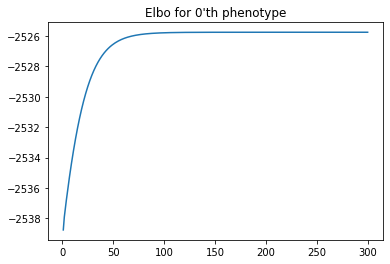

initial sigma_e_2 is 0.49606140040802266,sigma_u_2 is 0.49606140040802266
For the 1 phenotype, step 100,sigma_e_2 is 0.6823334674752348,sigma_u_2 is 0.3113391840843708,Elbo is -2525.489625177346, delta is 0.9994157189655264
For the 1 phenotype, step 200,sigma_e_2 is 0.6934070349567538,sigma_u_2 is 0.29994497098892825,Elbo is -2525.4644663841464, delta is 0.9999700583259293
For the 1 phenotype, step 300,sigma_e_2 is 0.6939518159712829,sigma_u_2 is 0.2993852377139621,Elbo is -2525.464405531995, delta is 0.9999985313283051
The estimation of beta is [ 8.70823920e-04  7.68185953e-04 -1.59892742e-03 -1.81134503e-03
 -2.20243615e-03 -1.02245733e-03  5.84190231e-04 -1.45098905e-03
 -1.06165865e-03  3.85942626e-03 -1.38777878e-17]


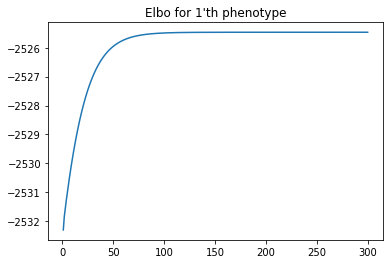

initial sigma_e_2 is 0.49169059215437766,sigma_u_2 is 0.49169059215437766
For the 2 phenotype, step 100,sigma_e_2 is 0.6798285029980765,sigma_u_2 is 0.30513695700660726,Elbo is -2503.398643765133, delta is 0.9993948838686694
For the 2 phenotype, step 200,sigma_e_2 is 0.6911293536204338,sigma_u_2 is 0.2935124171768827,Elbo is -2503.372143533081, delta is 0.9999683404504879
For the 2 phenotype, step 300,sigma_e_2 is 0.691696522199892,sigma_u_2 is 0.29292987251219793,Elbo is -2503.3720768392086, delta is 0.9999984143737543
The estimation of beta is [ 1.37650038e-04  4.25746114e-03 -2.16290504e-03  4.52259021e-03
  1.51864788e-03  1.34558492e-03 -4.02732045e-04  1.54233173e-03
 -9.07425791e-04 -4.92042708e-04 -1.41379963e-16]


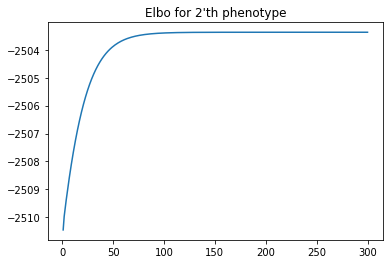

initial sigma_e_2 is 0.49896917720277917,sigma_u_2 is 0.49896917720277917
For the 3 phenotype, step 100,sigma_e_2 is 0.812601185094008,sigma_u_2 is 0.18597115578404827,Elbo is -2551.1783688375726, delta is 0.9985883815478999
For the 3 phenotype, step 200,sigma_e_2 is 0.8294263374126362,sigma_u_2 is 0.168919476050626,Elbo is -2551.1183745129965, delta is 0.9999074348097708
For the 3 phenotype, step 300,sigma_e_2 is 0.8304647844248922,sigma_u_2 is 0.16786880660448097,Elbo is -2551.1181451324373, delta is 0.9999940432463972
The estimation of beta is [ 2.22578034e-04 -1.47456778e-03 -1.52276749e-04  1.02928641e-03
  1.69376671e-04  7.99325481e-04 -7.18234652e-04 -8.22104083e-04
  7.51129006e-04  5.75536611e-04 -3.86518074e-16]


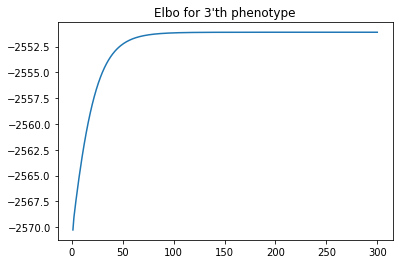

In [5]:
p=319147
n=5123
def PXEM(X,W,Wtu,u,vt,sigma,num_phenotype,n_iter):
    y_=y[:,num_phenotype]
    beta=linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y_)
    sigma_u_2=np.var(y_-X.dot(beta))/2
    sigma_e_2=np.var(y_-X.dot(beta))/2
    print('initial sigma_e_2 is {},sigma_u_2 is {}'.format(sigma_e_2,sigma_u_2))
    Elbo_list=[]
    delta=1.0
    for i in range(n_iter):
        # E-step
        D_hat=sigma/sigma_e_2+p/sigma_u_2   #Wtu.dot( (vt.dot(y_-X.dot(beta))/D_hat) )/sigma_e_2   #
        m= 1 / sigma_e_2 * Wtu @ (vt @ (y_ - X @ beta) / D_hat) 
        #remove the constant term
        Elbo=-0.5*n*np.log(sigma_e_2)-0.5/sigma_e_2*(linalg.norm(y_-X.dot(beta)-W.dot(m)))**2  \
             -0.5*p*np.log(sigma_u_2/p)-0.5*p/sigma_u_2*np.transpose(m).dot(m) \
             -0.5*np.sum(np.log(D_hat))+0.5*(p-n)*np.log(sigma_u_2/p)
        Elbo_list.append(Elbo)
        # M-step
        delta=np.transpose(y_-X.dot(beta)).dot(W).dot(m)/(np.transpose(m).dot(Wt).dot(W).dot(m)+np.sum(sigma/D_hat))
        #print(delta,beta)
        sigma_e_2=((linalg.norm(y_-X.dot(beta)-delta*W.dot(m)))**2 +  delta**2*np.sum(sigma/D_hat) )/n
        sigma_u_2=np.transpose(m).dot(m)+np.sum(1/D_hat)+(p-n)*sigma_u_2/p
        beta=linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y_-delta*W.dot(m))
        #reduction step
        sigma_u_2=sigma_u_2*delta**2
        if (i+1)%100==0:
            print('For the {} phenotype, step {},sigma_e_2 is {},sigma_u_2 is {},Elbo is {}, delta is {}'.format(num_phenotype,i+1,sigma_e_2,sigma_u_2,Elbo, delta))
    print('The estimation of beta is',beta)
    plt.figure()
    plt.plot(np.arange(n_iter) + 1, Elbo_list)
    plt.title('Elbo for '+str(num_phenotype)+'\'th phenotype')
    plt.show()
Wtu=Wt.dot(u)
# For the four phenotypes
for j in range(4):
    PXEM(X,W,Wtu,u,vt,sigma,j,n_iter=300)

# Fisher information using delta method

In [6]:
sigma_matrix=np.array([[0.7640,0.2264],[0.6898,0.3040],[0.6916,0.2929],[0.8325,0.1655]])
K=W.dot(Wt)/p
def FIM(i):
    sigma_e_2=sigma_matrix[i,0]
    sigma_u_2=sigma_matrix[i,1]
    omega_1=linalg.inv(sigma_e_2*np.eye(n)+K*sigma_u_2)
    FIM=np.zeros(shape=(2,2))
    omega_1_k=omega_1.dot(K)
    FIM[0,0]=np.trace(omega_1_k.dot(omega_1_k))
    FIM[0,1]=np.trace(omega_1_k.dot(omega_1))
    FIM[1,0]=FIM[0,1]
    FIM[1,1]=np.trace(omega_1.dot(omega_1))
    FIM=FIM/2
    cov=linalg.inv(FIM)
    print('For the {}\'th phenotype,the Fisher Information Matrix is {}. The covariance matrix of the variance component is {}'.format(i,FIM,cov))
    return cov
for i in range(4):
    sigma_e_2=sigma_matrix[i,0]
    sigma_u_2=sigma_matrix[i,1]
    a0=sigma_e_2/(sigma_e_2+sigma_u_2)**2
    b0=-sigma_u_2/(sigma_e_2+sigma_u_2)**2
    cov=FIM(i)
    standard_error=a0**2*cov[0,0]+2*a0*b0*cov[0,1]+b0**2*cov[1,1]
    print('the standard error is',standard_error)

For the 0'th phenotype,the Fisher Information Matrix is [[2694.32074576 2491.19129179]
 [2491.19129179 2675.35941103]]. The covariance matrix of the variance component is [[ 0.00266937 -0.00248562]
 [-0.00248562  0.00268829]]
the standard error is 0.002656312098355214
For the 1'th phenotype,the Fisher Information Matrix is [[2603.12571241 2464.91244808]
 [2464.91244808 2705.09492815]]. The covariance matrix of the variance component is [[ 0.00280057 -0.00255191]
 [-0.00255191  0.002695  ]]
the standard error is 0.0027187061799836413
For the 2'th phenotype,the Fisher Information Matrix is [[2659.66439651 2512.08600414]
 [2512.08600414 2750.47572846]]. The covariance matrix of the variance component is [[ 0.00273743 -0.00250017]
 [-0.00250017  0.00264705]]
the standard error is 0.002713728703345903
For the 3'th phenotype,the Fisher Information Matrix is [[2727.72015407 2470.82804253]
 [2470.82804253 2605.75078101]]. The covariance matrix of the variance component is [[ 0.00259856 -0.0024

# scaled lasso

In [7]:
from sklearn import linear_model
p=319147
n=5123
iter_num=5
beta=np.random.normal(size=[len(W[1])])
y_=y[:,0]
lamda0=np.sqrt(2*np.log(p)/n)
for i in range(iter_num):
    sigma=linalg.norm(y_-W.dot(beta))/np.sqrt(n)
    clf = linear_model.Lasso(alpha=lamda0*sigma)
    clf.fit(W, y_)
    beta=clf.coef_
    print(sigma)

571.1121701858112
0.9998716866476094
0.9956946218215035
0.9955384338735489
0.995532605933309


# Esitimate the correlation

In [8]:
from numpy import linalg
from scipy import sparse
y0=y[:,0]
y1=y[:,1]
y2=y[:,2]
y3=y[:,3]
Xt=np.transpose(X)
p=319147
n=5123
M=np.eye(n)-X.dot(linalg.inv(Xt.dot(X))).dot(Xt)
K=W.dot(Wt)/p
MK=M.dot(K)
S=np.zeros(shape=(2,2))
q=np.zeros(shape=(6,1))
S[0,0]=np.trace(MK.dot(MK))
S[0,1]=np.trace(MK)
S[1,0]=S[0,1]
S[1,1]=np.trace(M)
A=sparse.csr_matrix(np.eye(3))
B=sparse.csr_matrix(S)
S=sparse.kron(A,B).toarray()
for i in np.arange(3,0,-1):
    for j in range(i-1,-1,-1):
        y_1=y[:,i]
        y_2=y[:,j]
        MKM=MK.dot(M)
        q[0,0]=np.transpose(y_1).dot(MKM).dot(y_1)
        q[1,0]=np.transpose(y_1).dot(M).dot(y_1)
        q[2,0]=np.transpose(y_2).dot(MKM).dot(y_2)
        q[3,0]=np.transpose(y_2).dot(M).dot(y_2)
        q[4,0]=np.transpose(y_2).dot(MKM).dot(y_1)
        q[5,0]=np.transpose(y_2).dot(M).dot(y_1)
        theta=linalg.inv(S) @ q
        print('the rho between {}th and {}th is {}, rhoe is {}'.format(i,j,theta[4,0]/np.sqrt(theta[0,0]*theta[2,0]), \
                                                                       theta[5,0]/np.sqrt(theta[1,0]*theta[3,0])))

the rho between 3th and 2th is 0.3095632102312572, rhoe is 0.3465274428652885
the rho between 3th and 1th is -0.4059996263768988, rhoe is -0.4063012218752533
the rho between 3th and 0th is 0.2980038191162279, rhoe is 0.45577334763953053
the rho between 2th and 1th is -0.05584719044006718, rhoe is -0.1756264883816676
the rho between 2th and 0th is 0.9500783203251759, rhoe is 0.8542521200992436
the rho between 1th and 0th is 0.2600846254596574, rhoe is 0.07223273369691789
